Jedi
precision: 0.45454545454545453
recall: 0.5102040816326531
f1-score: 0.4807692307692308
total: 49

Sith
precision: 0.4666666666666667
recall: 0.4117647058823529
f1-score: 0.43749999999999994
total: 51

Accuracy: 0.46

Total Predictions: 100

[[25, 24], [30, 21]]


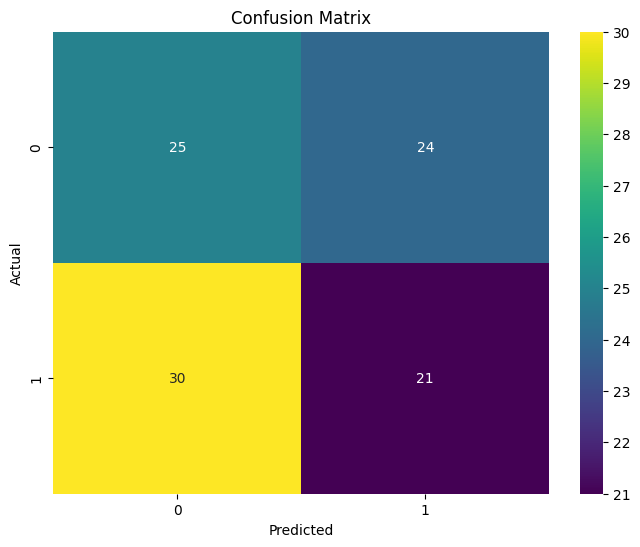

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


def confusion_matrix():
    with open('../resources/truth.txt', 'r') as file:
        truth = file.read().splitlines()
    with open('../resources/predictions.txt', 'r') as file:
        predictions = file.read().splitlines()

    matrix = [[0, 0], [0, 0]]
    labels = ['Jedi', 'Sith']
    for t, p in zip(truth, predictions):
        i = labels.index(t)
        j = labels.index(p)
        matrix[i][j] += 1
    return matrix


def calculate_metrics(matrix):
    tp_jedi = matrix[0][0]
    fp_jedi = matrix[1][0]
    fn_jedi = matrix[0][1]
    tn_jedi = matrix[1][1]
    
    tp_sith = matrix[1][1]
    fp_sith = matrix[0][1]
    fn_sith = matrix[1][0]
    
    precision_jedi = tp_jedi / (tp_jedi + fp_jedi) if (tp_jedi + fp_jedi) != 0 else 0
    recall_jedi = tp_jedi / (tp_jedi + fn_jedi) if (tp_jedi + fn_jedi) != 0 else 0
    f1_jedi = 2 * (precision_jedi * recall_jedi) / (precision_jedi + recall_jedi) if (precision_jedi + recall_jedi) != 0 else 0
    total_jedi = tp_jedi + fn_jedi
    
    precision_sith = tp_sith / (tp_sith + fp_sith) if (tp_sith + fp_sith) != 0 else 0
    recall_sith = tp_sith / (tp_sith + fn_sith) if (tp_sith + fn_sith) != 0 else 0
    f1_sith = 2 * (precision_sith * recall_sith) / (precision_sith + recall_sith) if (precision_sith + recall_sith) != 0 else 0
    total_sith = tp_sith + fn_sith
    
    accuracy = (tp_jedi + tn_jedi) / (tp_jedi + tn_jedi + fp_jedi + fn_jedi)
    total_predictions = sum(sum(row) for row in matrix)
    
    return {
        "Jedi": {
            'precision': precision_jedi,
            'recall': recall_jedi,
            'f1-score': f1_jedi,
            'total': total_jedi
        },
        "Sith":
        {
            'precision': precision_sith,
            'recall': recall_sith,
            'f1-score': f1_sith,
            'total': total_sith
        },
        "Accuracy": accuracy,
        "Total Predictions": total_predictions
    }


matrix = confusion_matrix()
metrics = calculate_metrics(matrix)

for key, value in metrics.items():
    if isinstance(value, dict):
        print(f"{key}")
        for k, val in value.items():
            print(f"{k}: {val}")
    else:
        print(f"{key}: {value}")
    print()

print(matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(), annot=True, fmt="d", cmap=plt.get_cmap("viridis"), xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()